#Time series analysis

###Importing required libraries and packages

In [34]:
! pip install scikit-learn

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing libraries for date and time
from time import time
from datetime import timedelta
from datetime import datetime

#importing libraries for visualization
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import statsmodels.api as sm

#importing libraries for time series models
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.preprocessing import MinMaxScaler

register_matplotlib_converters()


###Importing the dataset

In [111]:
#function to import dataset
df=pd.read_csv("monthly_sales.csv",parse_dates=['date'],index_col=0)



###Preprocessing

In [131]:
#function to set the date to yyyy-mm-dd format
def parser(s):
  return datetime.strptime(s,'%Y-%m')

df.rename(columns={
    'date': 'dates',
    'sales': 'expenses',

}, inplace=True)

#remove missing or null values
df= df.dropna(subset=["expenses"])

#sample data
print(df)

             expenses
date                 
2013-01-01   14236.90
2013-02-01    4519.89
2013-03-01   55691.01
2013-04-01   28295.35
2013-05-01   23648.29
2013-06-01   34595.13
2013-07-01   33946.39
2013-08-01   27909.47
2013-09-01   81777.35
2013-10-01   31453.39
2013-11-01   78628.72
2013-12-01   69545.62
2014-01-01   18174.08
2014-02-01   11951.41
2014-03-01   38726.25
2014-04-01   34195.21
2014-05-01   30131.69
2014-06-01   24797.29
2014-07-01   28765.33
2014-08-01   36898.33
2014-09-01   64595.92
2014-10-01   31404.92
2014-11-01   75972.56
2014-12-01   74919.52
2015-01-01   18542.49
2015-02-01   22867.71
2015-03-01   51186.22
2015-04-01   39248.59
2015-05-01   56691.08
2015-06-01   39430.44
2015-07-01   38440.76
2015-08-01   33265.56
2015-09-01   72908.11
2015-10-01   56463.13
2015-11-01   82192.32
2015-12-01   97237.42
2016-01-01   44703.14
2016-02-01   20301.13
2016-03-01   58872.35
2016-04-01   36521.54
2016-05-01   44261.11
2016-06-01   52981.73
2016-07-01   45264.42
2016-08-01

###Splitting into training and testing data

In [113]:
#first 75% data as training data
df_TRAIN = df[0:-12]
#last 25% data as testing data
df_TEST = df[-12:]

print(df_TEST)
print(df_TRAIN)

             expenses
date                 
2016-01-01   44703.14
2016-02-01   20301.13
2016-03-01   58872.35
2016-04-01   36521.54
2016-05-01   44261.11
2016-06-01   52981.73
2016-07-01   45264.42
2016-08-01   63120.89
2016-09-01   87866.65
2016-10-01   77776.92
2016-11-01  118447.83
2016-12-01   83829.32
            expenses
date                
2013-01-01  14236.90
2013-02-01   4519.89
2013-03-01  55691.01
2013-04-01  28295.35
2013-05-01  23648.29
2013-06-01  34595.13
2013-07-01  33946.39
2013-08-01  27909.47
2013-09-01  81777.35
2013-10-01  31453.39
2013-11-01  78628.72
2013-12-01  69545.62
2014-01-01  18174.08
2014-02-01  11951.41
2014-03-01  38726.25
2014-04-01  34195.21
2014-05-01  30131.69
2014-06-01  24797.29
2014-07-01  28765.33
2014-08-01  36898.33
2014-09-01  64595.92
2014-10-01  31404.92
2014-11-01  75972.56
2014-12-01  74919.52
2015-01-01  18542.49
2015-02-01  22867.71
2015-03-01  51186.22
2015-04-01  39248.59
2015-05-01  56691.08
2015-06-01  39430.44
2015-07-01  38440.76

In [114]:
#setting starting point of the data for training data
start_date=pd.to_datetime('2013-01-01')
df_TRAIN=df_TRAIN[start_date:]

##Plotting the data

([<matplotlib.axis.XTick at 0x27dca944560>,
 [Text(15706.0, 0, '2013-01-01'),
  Text(15737.0, 0, '2013-02-01'),
  Text(15765.0, 0, '2013-03-01'),
  Text(15796.0, 0, '2013-04-01'),
  Text(15826.0, 0, '2013-05-01'),
  Text(15857.0, 0, '2013-06-01'),
  Text(15887.0, 0, '2013-07-01'),
  Text(15918.0, 0, '2013-08-01'),
  Text(15949.0, 0, '2013-09-01'),
  Text(15979.0, 0, '2013-10-01'),
  Text(16010.0, 0, '2013-11-01'),
  Text(16040.0, 0, '2013-12-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16102.0, 0, '2014-02-01'),
  Text(16130.0, 0, '2014-03-01'),
  Text(16161.0, 0, '2014-04-01'),
  Text(16191.0, 0, '2014-05-01'),
  Text(16222.0, 0, '2014-06-01'),
  Text(16252.0, 0, '2014-07-01'),
  Text(16283.0, 0, '2014-08-01'),
  Text(16314.0, 0, '2014-09-01'),
  Text(16344.0, 0, '2014-10-01'),
  Text(16375.0, 0, '2014-11-01'),
  Text(16405.0, 0, '2014-12-01'),
  Text(16436.0, 0, '2015-01-01'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16495.0, 0, '2015-03-01'),
  Text(16526.0, 0, '2015-04-01'),
  Te

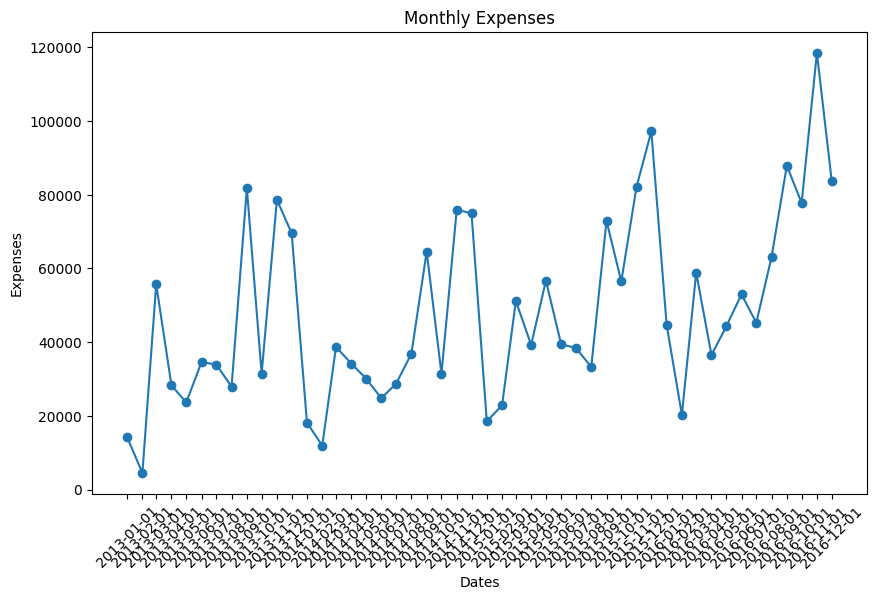

In [41]:
#detailed plot of the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['expenses'], marker='o', linestyle='-')
plt.title('Monthly Expenses')
plt.ylabel('Expenses')
plt.xlabel('Dates')
plt.xticks(df.index, rotation=45)

###Plotting acf and pacf of the data

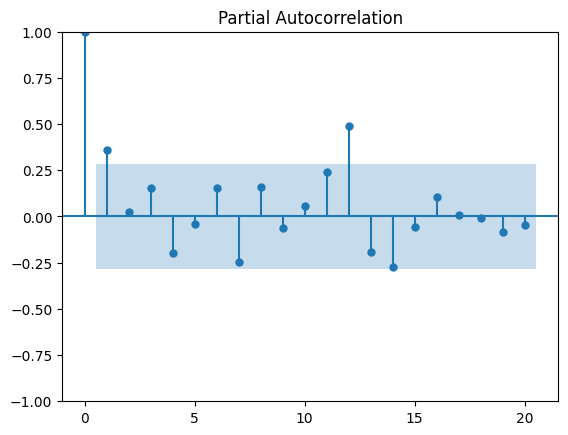

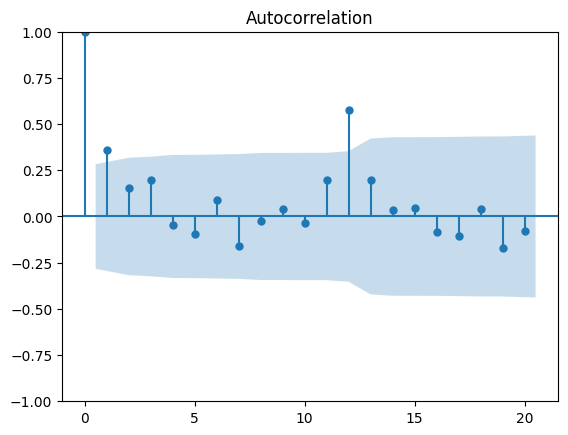

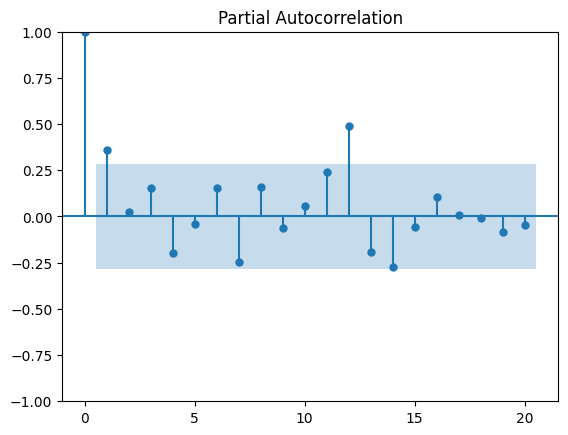

In [115]:
#acf & pacf plots
plot_acf(df, lags=20)
plot_pacf(df, lags=20)

###Setting starting and the ending indexes for the testing

In [116]:
#setting the test dataset as prediction points
prediction_start=df_TEST.index[0]
prediction_end=df_TEST.index[-1]

##**AR MODEL**

###Defining the model

In [117]:
#defining the AR model
model_1= ARIMA(df_TRAIN['expenses'], order=(2, 0, 0))

#fitting the model
ar_result = model_1.fit()
print(ar_result.summary())

                               SARIMAX Results                                
Dep. Variable:               expenses   No. Observations:                   36
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -411.690
Date:                Thu, 18 Jul 2024   AIC                            831.380
Time:                        09:54:17   BIC                            837.714
Sample:                    01-01-2013   HQIC                           833.590
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.342e+04   5224.039      8.312      0.000    3.32e+04    5.37e+04
ar.L1          0.2558      0.154      1.659      0.097      -0.046       0.558
ar.L2          0.0350      0.175      0.200      0.8

c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


##Prediction

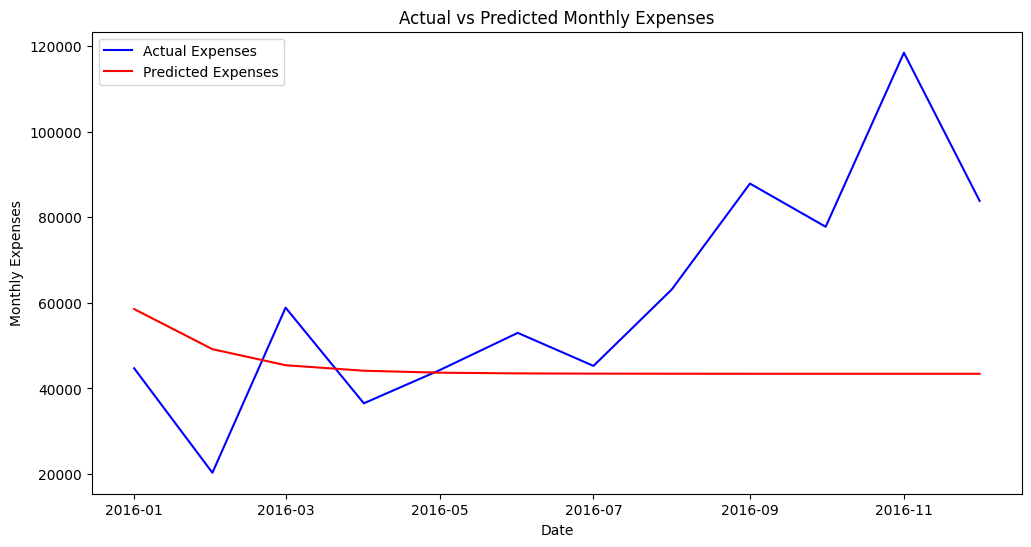

In [118]:
#predicting the values for testing data using the trained AR model
prediction_1=ar_result.predict(start=prediction_start,end=prediction_end)
residual_1=df_TEST['expenses']-prediction_1


#plotting the predicted(red) vs actual(blue) values
plt.figure(figsize=(12, 6))
plt.plot(df_TEST.index, df_TEST['expenses'], label='Actual Expenses', color='blue')
plt.plot(prediction_1.index, prediction_1, label='Predicted Expenses', color='red')

plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Date')
plt.ylabel('Monthly Expenses')
plt.legend()

plt.show()



Text(0.5, 1.0, 'Residuals')

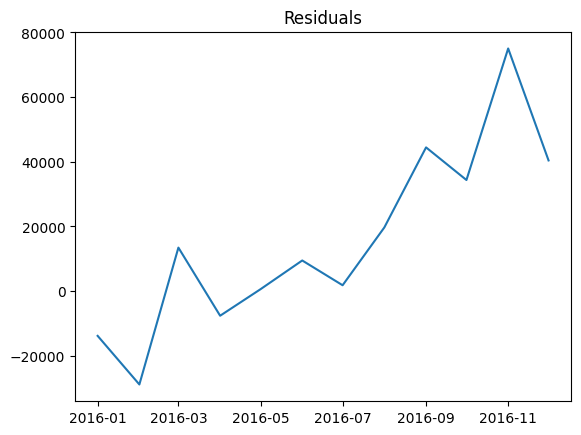

In [119]:
#plotting the residuals for prediction
plt.plot(residual_1)
plt.title('Residuals')

###**MA MODEL**

In [120]:
#defining the MA model
model_2= ARIMA(df_TRAIN['expenses'], order=(0, 0, 2))

#fitting the model
ma_result = model_2.fit()
print(ma_result.summary())

                               SARIMAX Results                                
Dep. Variable:               expenses   No. Observations:                   36
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -411.735
Date:                Thu, 18 Jul 2024   AIC                            831.470
Time:                        09:54:23   BIC                            837.804
Sample:                    01-01-2013   HQIC                           833.681
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.342e+04   5229.088      8.304      0.000    3.32e+04    5.37e+04
ma.L1          0.2532      0.174      1.451      0.147      -0.089       0.595
ma.L2         -0.0058      0.182     -0.032      0.9

c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


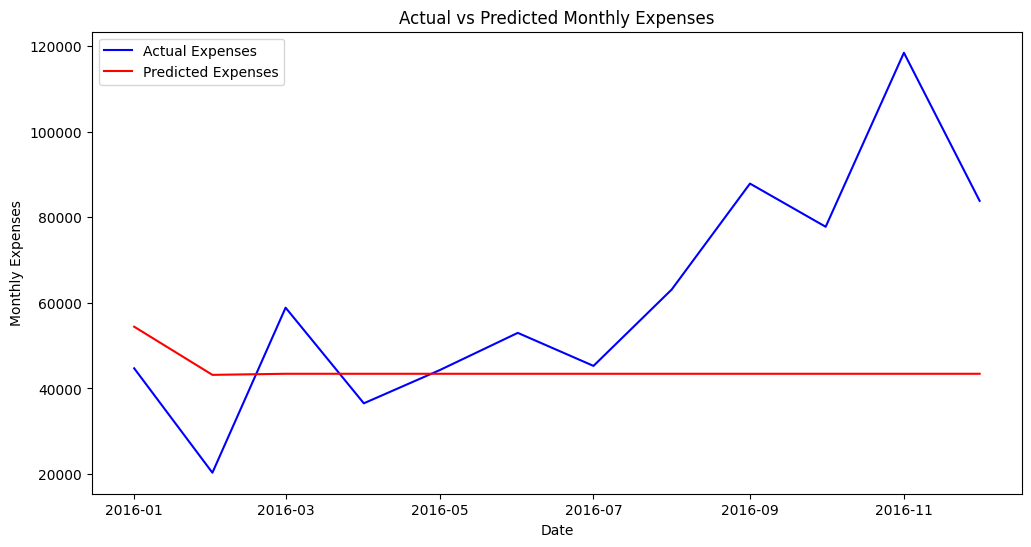

In [121]:
#predicting the values for testing data using the trained AR model
prediction_2=ma_result.predict(start=prediction_start,end=prediction_end)
residual_2=df_TEST['expenses']-prediction_2


#plotting the predicted(red) vs actual(blue) values
plt.figure(figsize=(12, 6))
plt.plot(df_TEST.index, df_TEST['expenses'], label='Actual Expenses', color='blue')
plt.plot(prediction_2.index, prediction_2, label='Predicted Expenses', color='red')

plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Date')
plt.ylabel('Monthly Expenses')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Residuals')

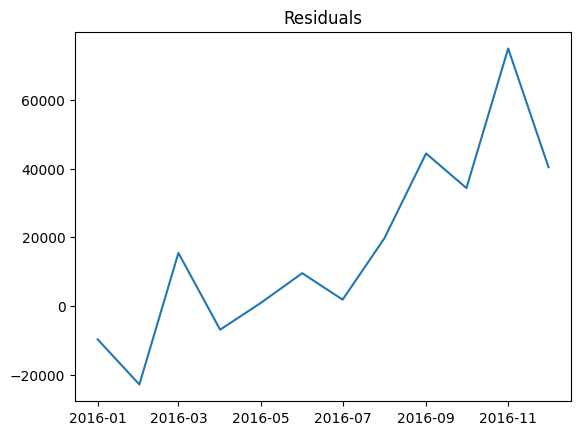

In [122]:
#plotting the residuals for prediction
plt.plot(residual_2)
plt.title('Residuals')

###**ARIMA MODEL**

In [123]:
#defining the ARIMA model
model_3= ARIMA(df['expenses'], order=(2, 2, 2))

#fitting the model
arima_result = model_3.fit()

c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


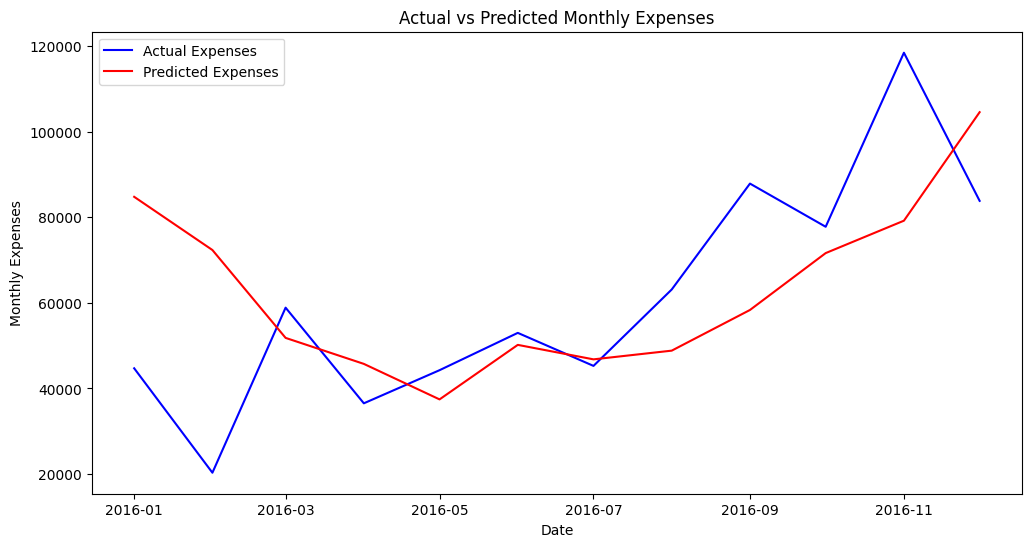

In [124]:
#predicting the values for testing data using the trained AR model
prediction_3=arima_result.predict(start=prediction_start,end=prediction_end)
residual_3=df_TEST['expenses']-prediction_3


#plotting the predicted(red) vs actual(blue) values
plt.figure(figsize=(12, 6))
plt.plot(df_TEST.index, df_TEST['expenses'], label='Actual Expenses', color='blue')
plt.plot(prediction_3.index, prediction_3, label='Predicted Expenses', color='red')

plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Date')
plt.ylabel('Monthly Expenses')
plt.legend()

plt.show()


Text(0.5, 1.0, 'Residuals')

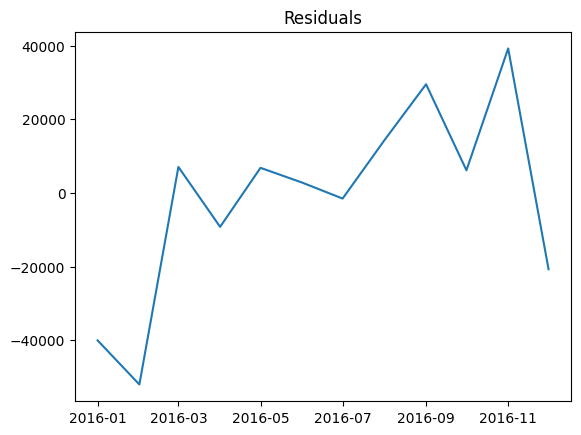

In [52]:
#plotting the residuals for prediction
plt.plot(residual_3)
plt.title('Residuals')

###**SARIMA**

In [125]:
#defining the SARIMA model
model_4=SARIMAX(df_TRAIN['expenses'],order=(2,2,2),seasonal_order=(1,1,1,12))

#fitting the model
sarima_result = model_4.fit()

c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


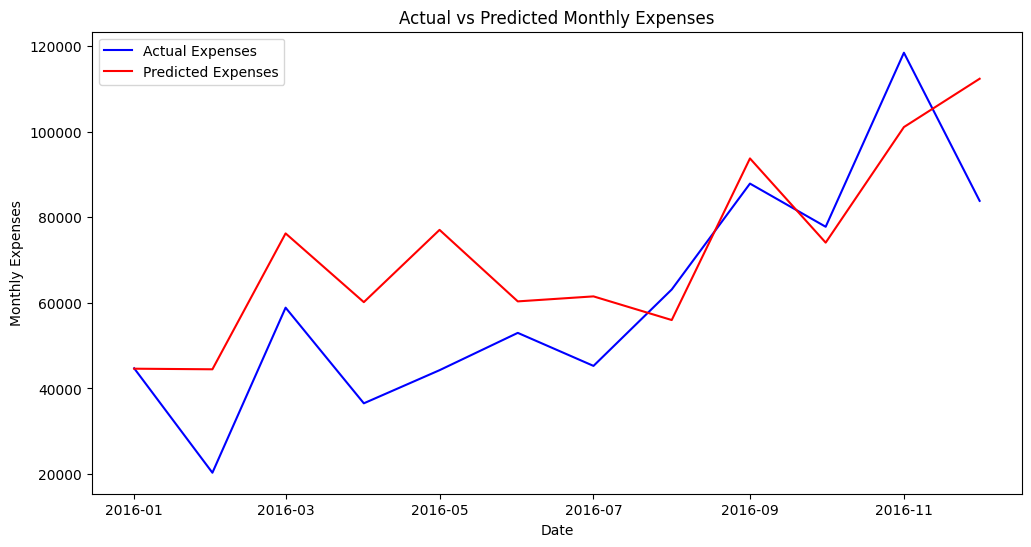

In [126]:
#predicting the values for testing data using the trained AR model
prediction_4=sarima_result.predict(start=prediction_start,end=prediction_end)
residual_4=df_TEST['expenses']-prediction_4


#plotting the predicted(red) vs actual(blue) values
plt.figure(figsize=(12, 6))
plt.plot(df_TEST.index, df_TEST['expenses'], label='Actual Expenses', color='blue')
plt.plot(prediction_4.index, prediction_4, label='Predicted Expenses', color='red')

plt.title('Actual vs Predicted Monthly Expenses')
plt.xlabel('Date')
plt.ylabel('Monthly Expenses')
plt.legend()

plt.show()


Text(0.5, 1.0, 'Residuals')

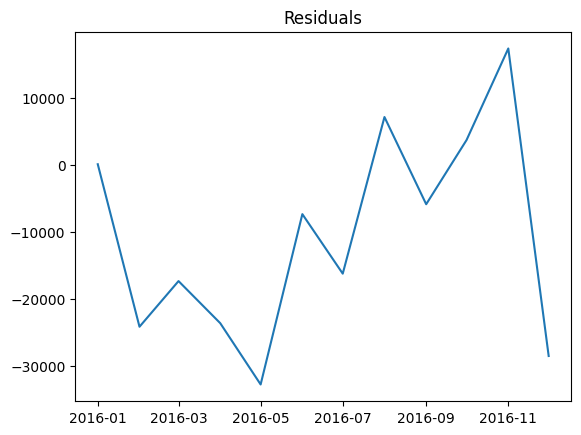

In [127]:
#plotting the residuals for prediction
plt.plot(residual_4)
plt.title('Residuals')

#LSTM

Epoch 1/1000


c:\Users\vsharma6\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 - 1s - 71ms/step - loss: 0.0461 - val_loss: 0.0658
Epoch 2/1000
21/21 - 0s - 4ms/step - loss: 0.0283 - val_loss: 0.0775
Epoch 3/1000
21/21 - 0s - 4ms/step - loss: 0.0284 - val_loss: 0.0656
Epoch 4/1000
21/21 - 0s - 6ms/step - loss: 0.0312 - val_loss: 0.0734
Epoch 5/1000
21/21 - 0s - 4ms/step - loss: 0.0279 - val_loss: 0.0787
Epoch 6/1000
21/21 - 0s - 4ms/step - loss: 0.0286 - val_loss: 0.0812
Epoch 7/1000
21/21 - 0s - 4ms/step - loss: 0.0290 - val_loss: 0.0573
Epoch 8/1000
21/21 - 0s - 4ms/step - loss: 0.0316 - val_loss: 0.0720
Epoch 9/1000
21/21 - 0s - 4ms/step - loss: 0.0282 - val_loss: 0.0651
Epoch 10/1000
21/21 - 0s - 4ms/step - loss: 0.0248 - val_loss: 0.0815
Epoch 11/1000
21/21 - 0s - 4ms/step - loss: 0.0274 - val_loss: 0.0590
Epoch 12/1000
21/21 - 0s - 4ms/step - loss: 0.0260 - val_loss: 0.0763
Epoch 13/1000
21/21 - 0s - 4ms/step - loss: 0.0249 - val_loss: 0.0667
Epoch 14/1000
21/21 - 0s - 4ms/step - loss: 0.0264 - val_loss: 0.1288
Epoch 15/1000
21/21 - 0s - 4ms/step - los

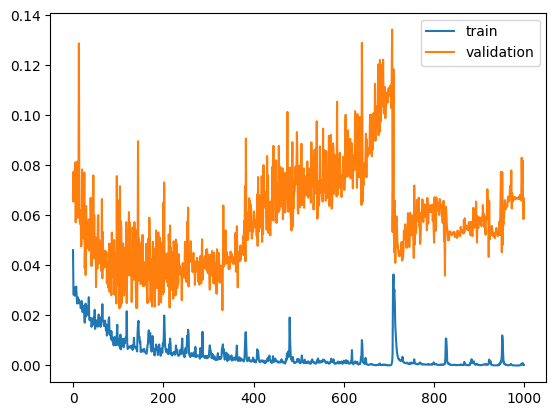

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


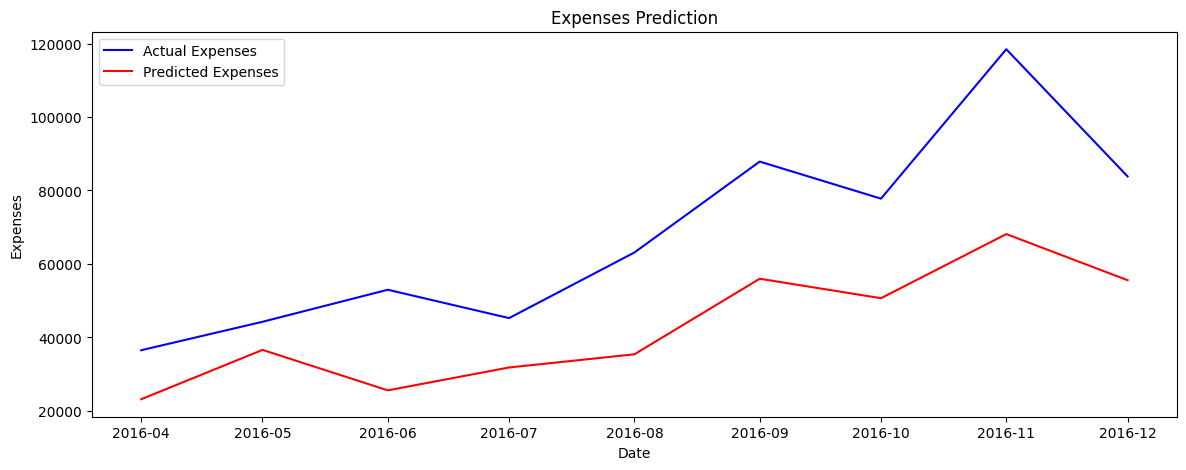

In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Function to create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 12  # You can adjust the sequence length as needed
x, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
split_index = int(0.75 * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape y_train and y_test to 2D arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=1000, validation_split=0.2, verbose=2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and true values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df.index[-len(predictions):], y_test, label='Actual Expenses', color='blue')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Expenses', color='red')
plt.title('Expenses Prediction')
plt.xlabel('Date')
plt.ylabel('Expenses')
plt.legend()
plt.show()


##Combined graph for prediction 

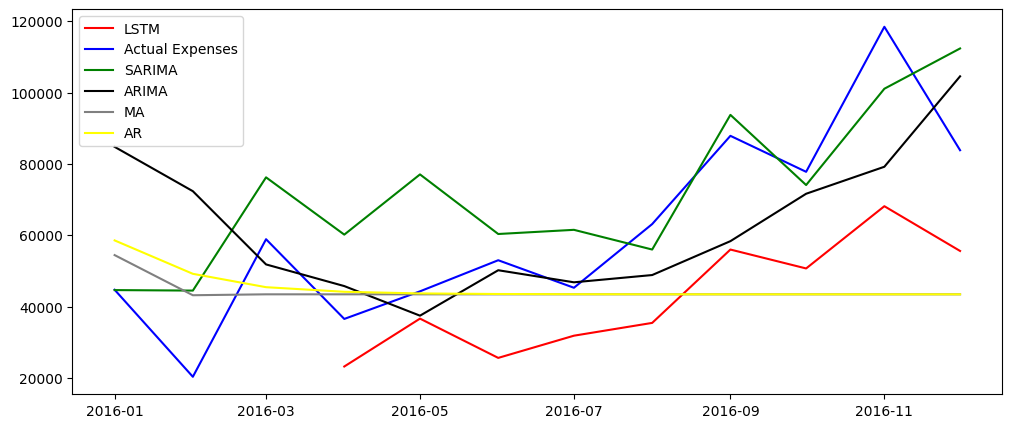

In [149]:

plt.figure(figsize=(12, 5))
#plt.plot(df.index[-len(predictions):], y_test, label='Actual Expenses', color='blue')
plt.plot(df.index[-len(predictions):], predictions, label='LSTM', color='red')

plt.plot(df_TEST.index, df_TEST['expenses'], label='Actual Expenses', color='blue')
plt.plot(prediction_4.index, prediction_4, label='SARIMA', color='green')


plt.plot(prediction_3.index, prediction_3, label='ARIMA', color='black')


plt.plot(prediction_2.index, prediction_2, label='MA', color='grey')


plt.plot(prediction_1.index, prediction_1, label='AR', color='yellow')

plt.legend()
plt.show()